### EDA for search trends, health, hospitalisations and mobility

In [1]:
DATA_PATH = r"datasets/"

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

### Import index data to join the different datasets together

In [2]:
df_index = pd.read_csv(DATA_PATH+"index.csv")
df_index.head()

,location_key,place_id,wikidata_id,datacommons_id,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,locality_code,locality_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level
0,AD,ChIJlfCemC71pRIRkn_qeNc-yQc,Q228,country/AND,AD,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,AD,AND,0
1,AE,ChIJvRKrsd9IXj4RpwoIwFYv0zM,Q878,country/ARE,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,AE,ARE,0
2,AF,ChIJbQL_-LZu0TgReNqWvg1GtfM,Q889,country/AFG,AF,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,AF,AFG,0
3,AF_BAL,ChIJWZOescNSyzgRkmVJ8fmfR3k,Q121104,NaN,AF,Afghanistan,BAL,Balkh,NaN,NaN,NaN,NaN,AF,AFG,1
4,AF_BAM,ChIJw-bKQwDr0jgRQiw8jHsQ-HI,Q171382,NaN,AF,Afghanistan,BAM,Bamyan,NaN,NaN,NaN,NaN,AF,AFG,1


## Part 1: EDA on Health.csv

Description of dataset: https://github.com/GoogleCloudPlatform/covid-19-open-data/blob/main/docs/table-health.md

In [3]:
df_health = pd.read_csv(DATA_PATH+"health.csv")
df_health.head()

,location_key,life_expectancy,smoking_prevalence,diabetes_prevalence,infant_mortality_rate,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,hospital_beds_per_1000,nurses_per_1000,physicians_per_1000,health_expenditure_usd,out_of_pocket_health_expenditure_usd
0,AD,NaN,33.5,7.7,2.7,NaN,NaN,NaN,NaN,NaN,4.0128,3.3333,4040.786621,1688.121460
1,AE,77.814,28.9,16.3,6.5,69.555,44.863,54.7,16.8,NaN,5.7271,2.5278,1357.017456,256.034485
2,AF,64.486,NaN,9.2,47.9,237.554,192.532,211.1,29.8,0.5,0.1755,0.2782,67.122650,50.665913
3,AG,76.885,NaN,13.1,5.0,126.917,83.136,29.9,22.6,NaN,4.5171,2.9560,673.859680,235.749039
4,AL,78.900,28.7,9.0,7.8,93.315,49.486,68.0,17.0,NaN,3.6495,1.2164,NaN,NaN


In [4]:
## Join country_name from index to df_health
df_health = pd.merge(df_health, df_index[["location_key", "country_name"]], on = "location_key", how = "left")

In [5]:
df_health.head()

,location_key,life_expectancy,smoking_prevalence,diabetes_prevalence,infant_mortality_rate,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,hospital_beds_per_1000,nurses_per_1000,physicians_per_1000,health_expenditure_usd,out_of_pocket_health_expenditure_usd,country_name
0,AD,NaN,33.5,7.7,2.7,NaN,NaN,NaN,NaN,NaN,4.0128,3.3333,4040.786621,1688.121460,Andorra
1,AE,77.814,28.9,16.3,6.5,69.555,44.863,54.7,16.8,NaN,5.7271,2.5278,1357.017456,256.034485,United Arab Emirates
2,AF,64.486,NaN,9.2,47.9,237.554,192.532,211.1,29.8,0.5,0.1755,0.2782,67.122650,50.665913,Afghanistan
3,AG,76.885,NaN,13.1,5.0,126.917,83.136,29.9,22.6,NaN,4.5171,2.9560,673.859680,235.749039,Antigua and Barbuda
4,AL,78.900,28.7,9.0,7.8,93.315,49.486,68.0,17.0,NaN,3.6495,1.2164,NaN,NaN,Albania


#### Count of countries in dataset

We have many counts of USA because many regions are recorded individually. Suggest that we average out the regions so that we just get one record per country. Since on a region basis, only 10 or so (out of 210 countries) countries have more than 1 region, so it would be hard to compare metrics across countries.

In [6]:
df_health["country_name"].value_counts().head(20)

United States of America    3076
Switzerland                   27
Italy                         22
Sweden                        21
United Kingdom                19
Spain                         19
France                        17
Germany                       17
Poland                        16
Czech Republic                15
Netherlands                   13
Belgium                       12
Austria                       10
Canada                         9
Norway                         8
Portugal                       8
Malaysia                       2
Pakistan                       1
New Zealand                    1
Nicaragua                      1
Name: country_name, dtype: int64

In [7]:
print(len(df_health["country_name"].unique()))

210


### Top 10 and bottom 10 countries by life expectancy

In [8]:
df_temp = df_health[["life_expectancy", "country_name"]].groupby(by = "country_name", as_index=False).mean().nlargest(n = 10, columns = "life_expectancy")

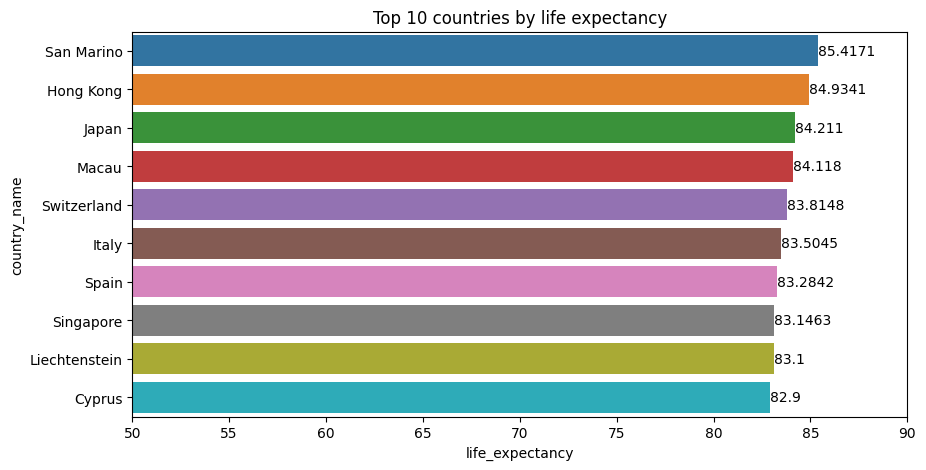

In [9]:
fig, ax = plt.subplots(figsize= (10, 5))
sns.barplot(data = df_temp, y = "country_name", x = "life_expectancy")
ax.set_xlim(50, 90)
ax.set_title("Top 10 countries by life expectancy")

# Show values next to bars 
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

In [10]:
df_temp = df_health[["life_expectancy", "country_name"]].groupby(by = "country_name", as_index=False).mean().nsmallest(n = 10, columns = "life_expectancy")

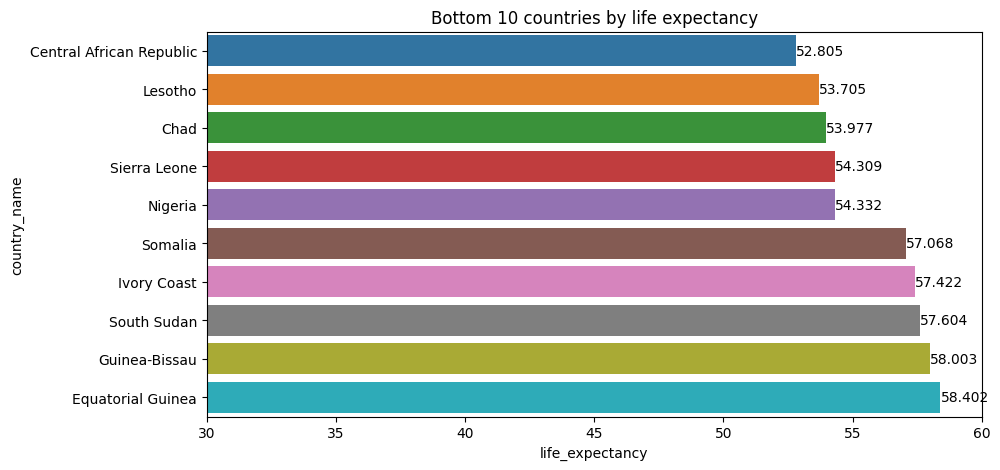

In [11]:
fig, ax = plt.subplots(figsize= (10, 5))
sns.barplot(data = df_temp, y = "country_name", x = "life_expectancy")
ax.set_xlim(30, 60)
ax.set_title('Bottom 10 countries by life expectancy')

# Show values next to bars 
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

### Top 10 and bottom 10 countries by adult male and female mortality rate

In [12]:
df_temp = df_health[["adult_male_mortality_rate", "country_name"]].groupby(by = "country_name", as_index=False).mean().nlargest(n = 10, columns = "adult_male_mortality_rate")

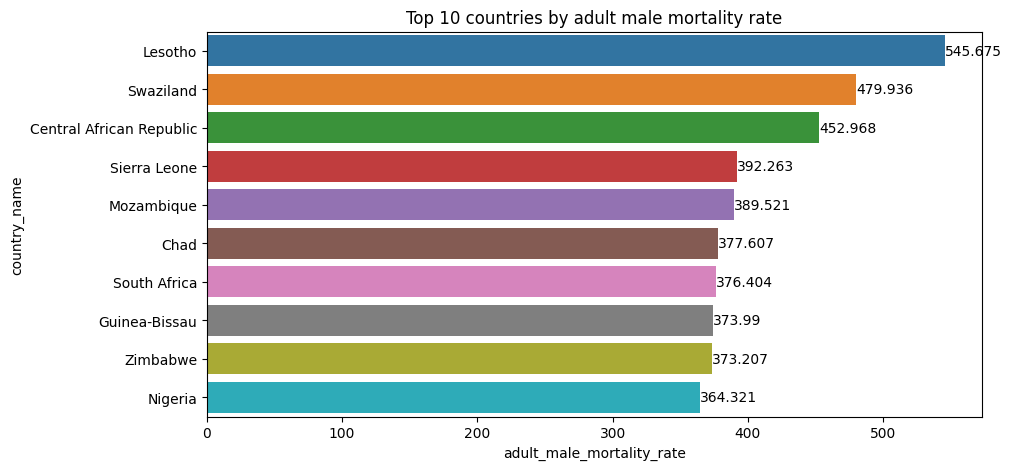

In [13]:
fig, ax = plt.subplots(figsize= (10, 5))
sns.barplot(data = df_temp, y = "country_name", x = "adult_male_mortality_rate")
ax.set_title('Top 10 countries by adult male mortality rate')

# Show values next to bars 
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

In [14]:
df_temp = df_health[["adult_male_mortality_rate", "country_name"]].groupby(by = "country_name", as_index=False).mean().nsmallest(n = 10, columns = "adult_male_mortality_rate")

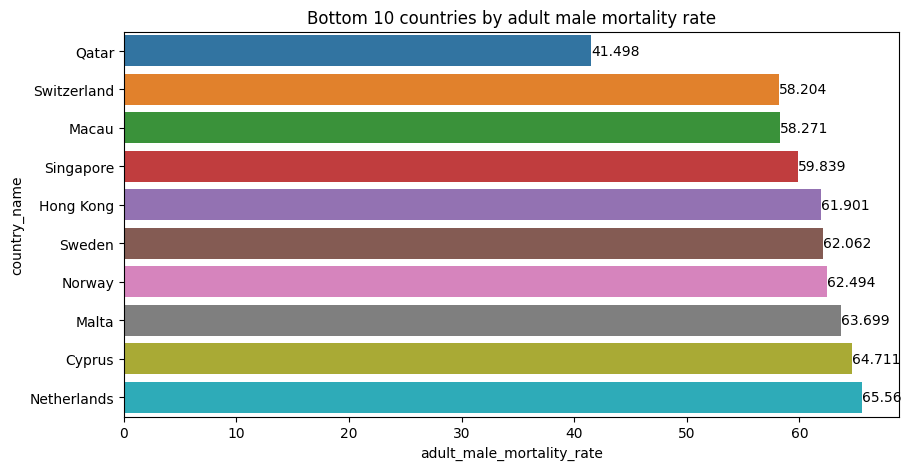

In [15]:
fig, ax = plt.subplots(figsize= (10, 5))
sns.barplot(data = df_temp, y = "country_name", x = "adult_male_mortality_rate")
ax.set_title('Bottom 10 countries by adult male mortality rate')

# Show values next to bars 
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

In [16]:
df_temp = df_health[["adult_female_mortality_rate", "country_name"]].groupby(by = "country_name", as_index=False).mean().nlargest(n = 10, columns = "adult_female_mortality_rate")

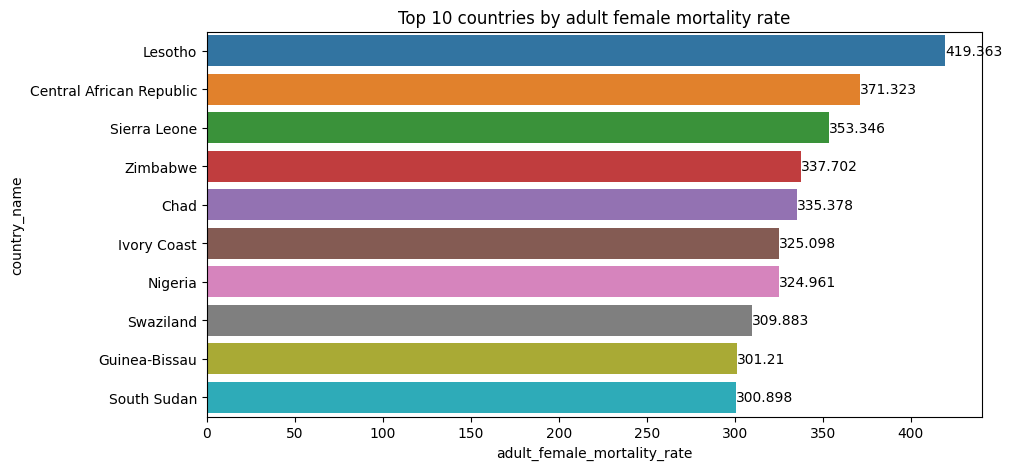

In [17]:
fig, ax = plt.subplots(figsize= (10, 5))
sns.barplot(data = df_temp, y = "country_name", x = "adult_female_mortality_rate")
ax.set_title('Top 10 countries by adult female mortality rate')

# Show values next to bars 
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

In [18]:
df_temp = df_health[["adult_female_mortality_rate", "country_name"]].groupby(by = "country_name", as_index=False).mean().nsmallest(n = 10, columns = "adult_female_mortality_rate")

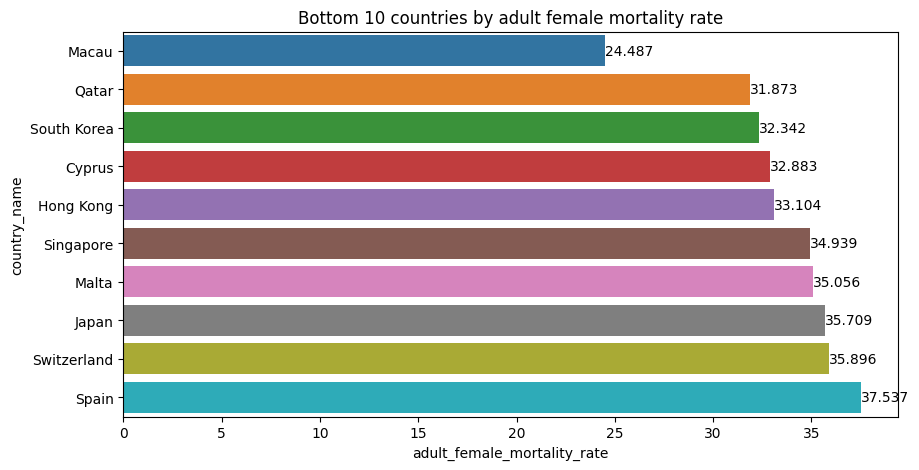

In [19]:
fig, ax = plt.subplots(figsize= (10, 5))
sns.barplot(data = df_temp, y = "country_name", x = "adult_female_mortality_rate")
ax.set_title('Bottom 10 countries by adult female mortality rate')

# Show values next to bars 
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

#### Top 10 and bottom 10 countries for healthcare expenditure

In [20]:
df_temp = df_health[["health_expenditure_usd", "country_name"]].groupby(by = "country_name", as_index=False).mean().nsmallest(n = 10, columns = "health_expenditure_usd")

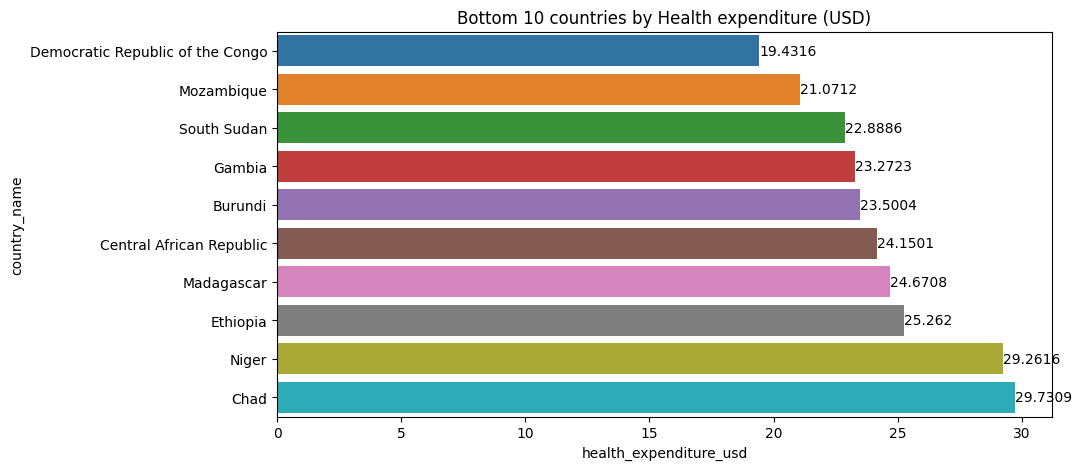

In [21]:
fig, ax = plt.subplots(figsize= (10, 5))
sns.barplot(data = df_temp, y = "country_name", x = "health_expenditure_usd")
ax.set_title('Bottom 10 countries by Health expenditure (USD)')

# Show values next to bars 
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

In [22]:
df_temp = df_health[["health_expenditure_usd", "country_name"]].groupby(by = "country_name", as_index=False).mean().nlargest(n = 10, columns = "health_expenditure_usd")

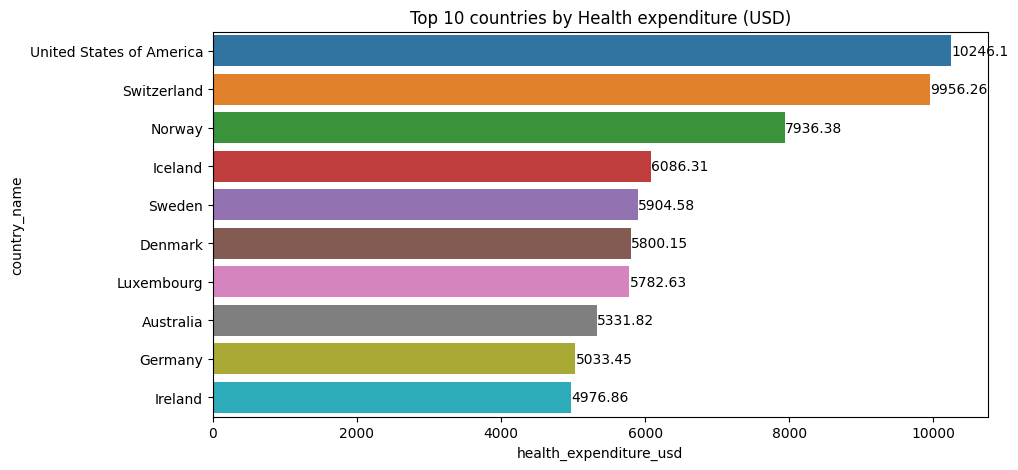

In [23]:
fig, ax = plt.subplots(figsize= (10, 5))
sns.barplot(data = df_temp, y = "country_name", x = "health_expenditure_usd")
ax.set_title('Top 10 countries by Health expenditure (USD)')

# Show values next to bars 
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

#### Top 10 and bottom 10 for no. of hospital beds per 1000

In [24]:
df_temp = df_health[["hospital_beds_per_1000", "country_name"]].groupby(by = "country_name", as_index=False).mean().nsmallest(n = 10, columns = "hospital_beds_per_1000")

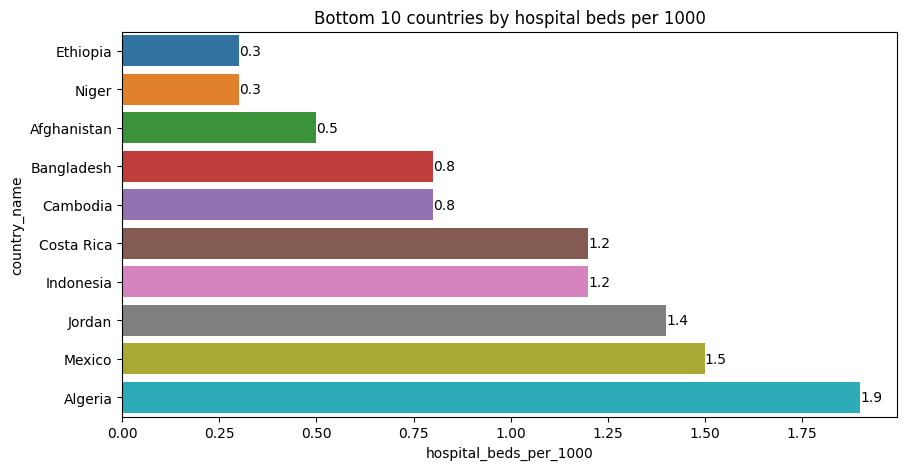

In [25]:
fig, ax = plt.subplots(figsize= (10, 5))
sns.barplot(data = df_temp, y = "country_name", x = "hospital_beds_per_1000")
ax.set_title('Bottom 10 countries by hospital beds per 1000')

# Show values next to bars 
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

In [26]:
df_temp = df_health[["hospital_beds_per_1000", "country_name"]].groupby(by = "country_name", as_index=False).mean().nlargest(n = 10, columns = "hospital_beds_per_1000")

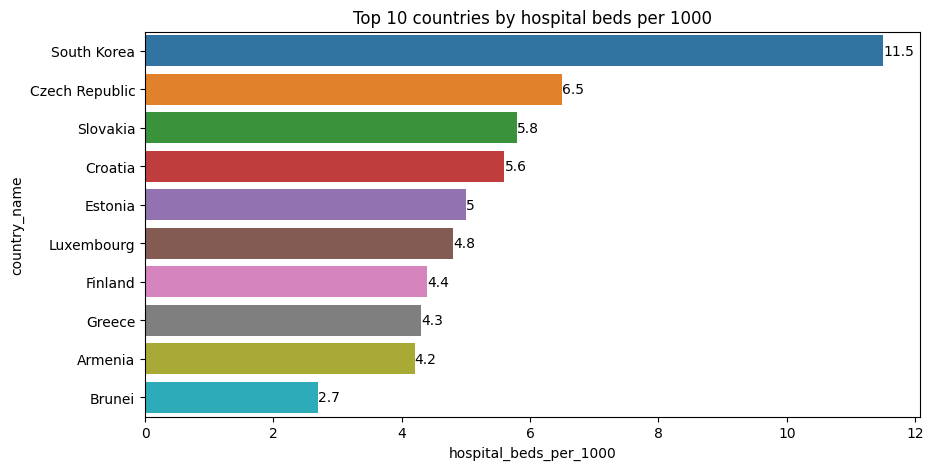

In [27]:
fig, ax = plt.subplots(figsize= (10, 5))
sns.barplot(data = df_temp, y = "country_name", x = "hospital_beds_per_1000")
ax.set_title('Top 10 countries by hospital beds per 1000')

# Show values next to bars 
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

## Part 2: EDA on Mobility

Description of dataset: https://github.com/GoogleCloudPlatform/covid-19-open-data/blob/main/docs/table-mobility.md

In [28]:
df_mobility = pd.read_csv(DATA_PATH+"mobility.csv")
df_mobility.head()

,date,location_key,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential
0,2020-02-15,AE,0.0,4.0,5.0,0.0,2.0,1.0
1,2020-02-16,AE,1.0,4.0,4.0,1.0,2.0,1.0
2,2020-02-17,AE,-1.0,1.0,5.0,1.0,2.0,1.0
3,2020-02-18,AE,-2.0,1.0,5.0,0.0,2.0,1.0
4,2020-02-19,AE,-2.0,0.0,4.0,-1.0,2.0,1.0


In [29]:
# Join the country name to the dataframe
df_mobility = pd.merge(df_mobility, df_index[["location_key", "country_name"]], on = "location_key", how = "left")

In [30]:
df_mobility.head()

,date,location_key,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,country_name
0,2020-02-15,AE,0.0,4.0,5.0,0.0,2.0,1.0,United Arab Emirates
1,2020-02-16,AE,1.0,4.0,4.0,1.0,2.0,1.0,United Arab Emirates
2,2020-02-17,AE,-1.0,1.0,5.0,1.0,2.0,1.0,United Arab Emirates
3,2020-02-18,AE,-2.0,1.0,5.0,0.0,2.0,1.0,United Arab Emirates
4,2020-02-19,AE,-2.0,0.0,4.0,-1.0,2.0,1.0,United Arab Emirates


### Lineplots of selected countries, using the health dataset to choose countries to visualise

<AxesSubplot:xlabel='date'>

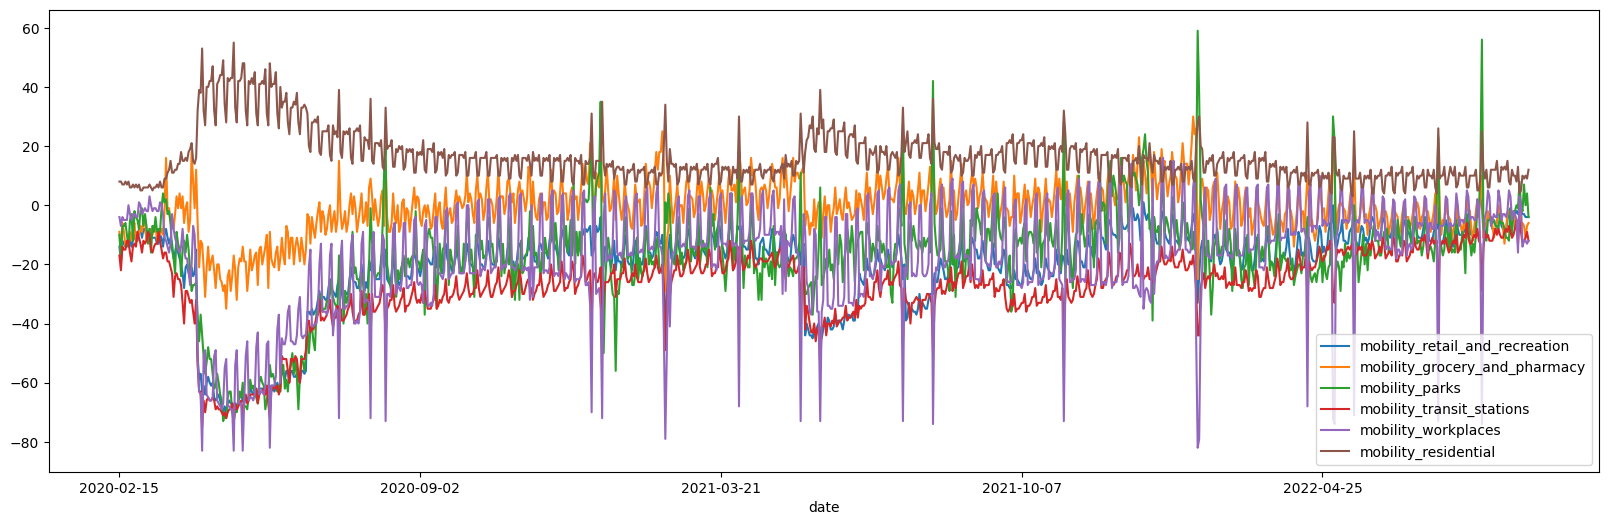

In [31]:
df_mobility.loc[df_mobility["country_name"] == "Singapore"].plot(figsize=(20, 6), x = "date")

### Calculate 7 days rolling average to better visualise the data - too many short term fluctuations

In [60]:
def calc_rolling_avg(country, colnames, num_days) :
    """
    Accepts country in string, colnames as data.columns, num_days to set window of rolling avg
    Returns dataframe with 7 days rolling average
    """
    
    df_rolling_avg = pd.DataFrame(data = {
    "date" : [],
    "mobility_retail_and_recreation" : [],
    "mobility_grocery_and_pharmacy" : [],
    "mobility_parks" : [],
    "mobility_transit_stations" : [],
    "mobility_workplaces" : [],
    "mobility_residential" : []
})
    
    df_rolling_avg["date"] = df_mobility.loc[df_mobility["country_name"] == country]["date"]

    for col in colnames[2:-1] :
        # we exclude first 2 cols and last col because those are not the columns with mobility metrics
        df_rolling_avg[col] = df_mobility.loc[df_mobility["country_name"] == country][col].rolling(num_days).mean()
    
    return df_rolling_avg


In [51]:
df_rolling_avg = calc_rolling_avg("Singapore", df_mobility.columns, 7)

<AxesSubplot:title={'center':'7 Days rolling average - Mobility in Singapore'}, xlabel='date'>

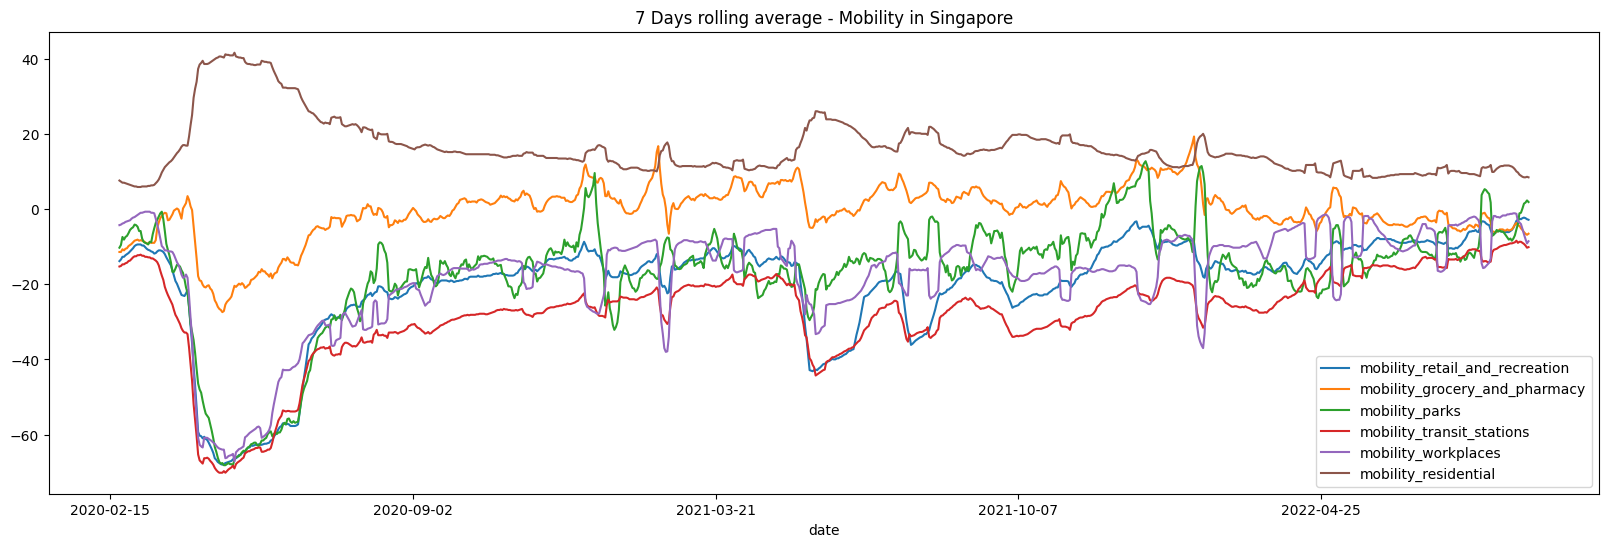

In [52]:
df_rolling_avg.plot(figsize=(20, 6), x = "date", title = "7 Days rolling average - Mobility in Singapore")

In [53]:
df_rolling_avg = calc_rolling_avg("South Korea", df_mobility.columns, 7)

<AxesSubplot:title={'center':'7 Days rolling average - Mobility in South Korea'}, xlabel='date'>

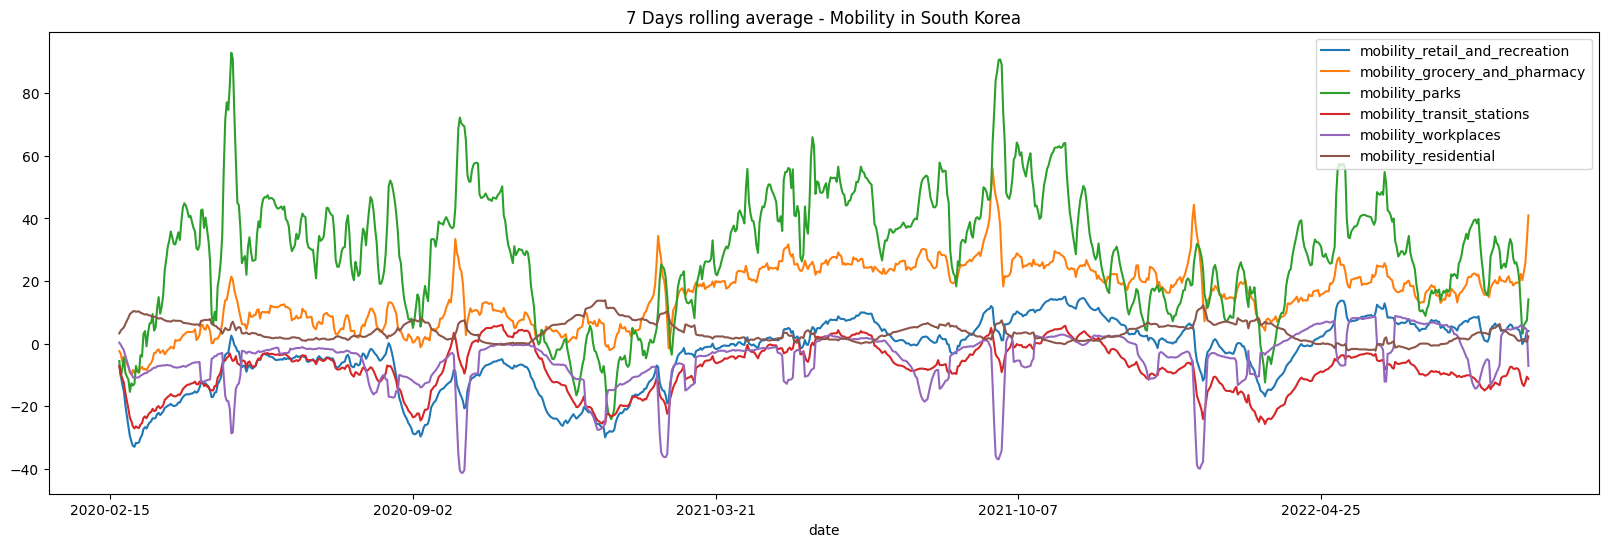

In [54]:
df_rolling_avg.plot(figsize=(20, 6), x = "date", title = "7 Days rolling average - Mobility in South Korea")

<AxesSubplot:title={'center':'30 Days rolling average - Mobility in Indonesia'}, xlabel='date'>

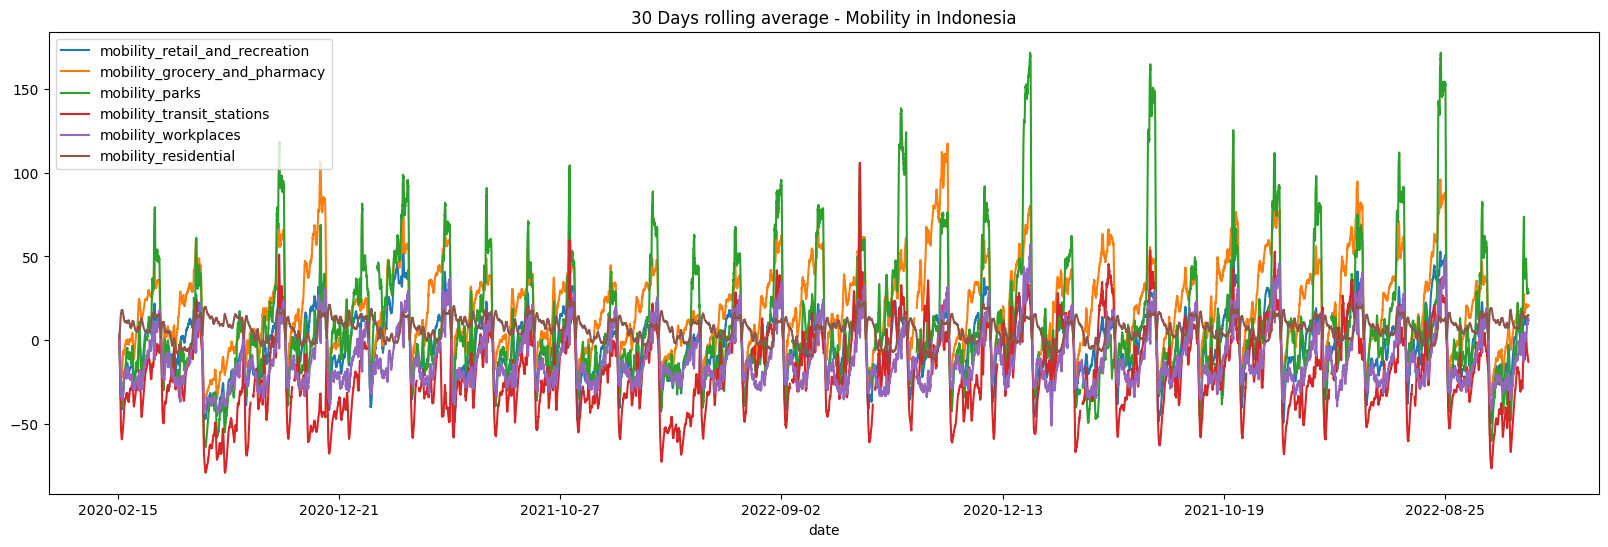

In [62]:
df_rolling_avg = calc_rolling_avg("Indonesia", df_mobility.columns, 30)
df_rolling_avg.plot(figsize=(20, 6), x = "date", title = "30 Days rolling average - Mobility in Indonesia")

<AxesSubplot:title={'center':'7 Days rolling average - Mobility in Afghanistan'}, xlabel='date'>

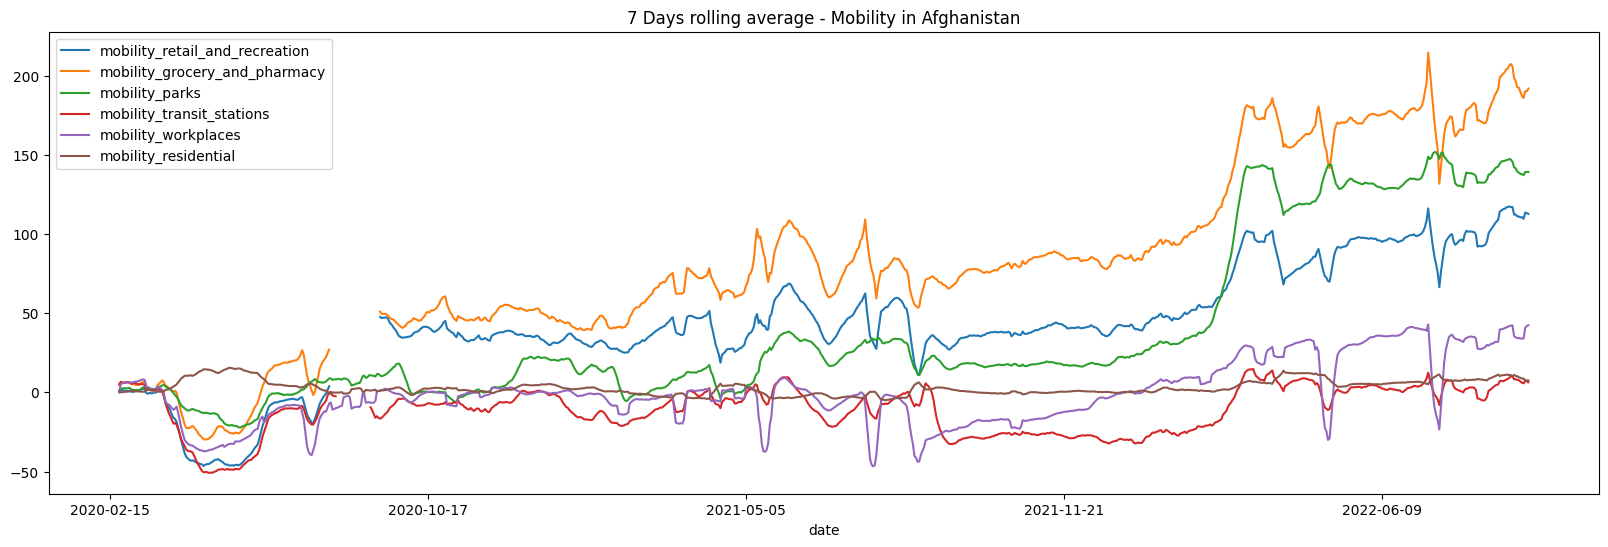

In [56]:
df_rolling_avg = calc_rolling_avg("Afghanistan", df_mobility.columns, 7)
df_rolling_avg.plot(figsize=(20, 6), x = "date", title = "7 Days rolling average - Mobility in Afghanistan")

<AxesSubplot:title={'center':'30 Days rolling average - Mobility in Mexico'}, xlabel='date'>

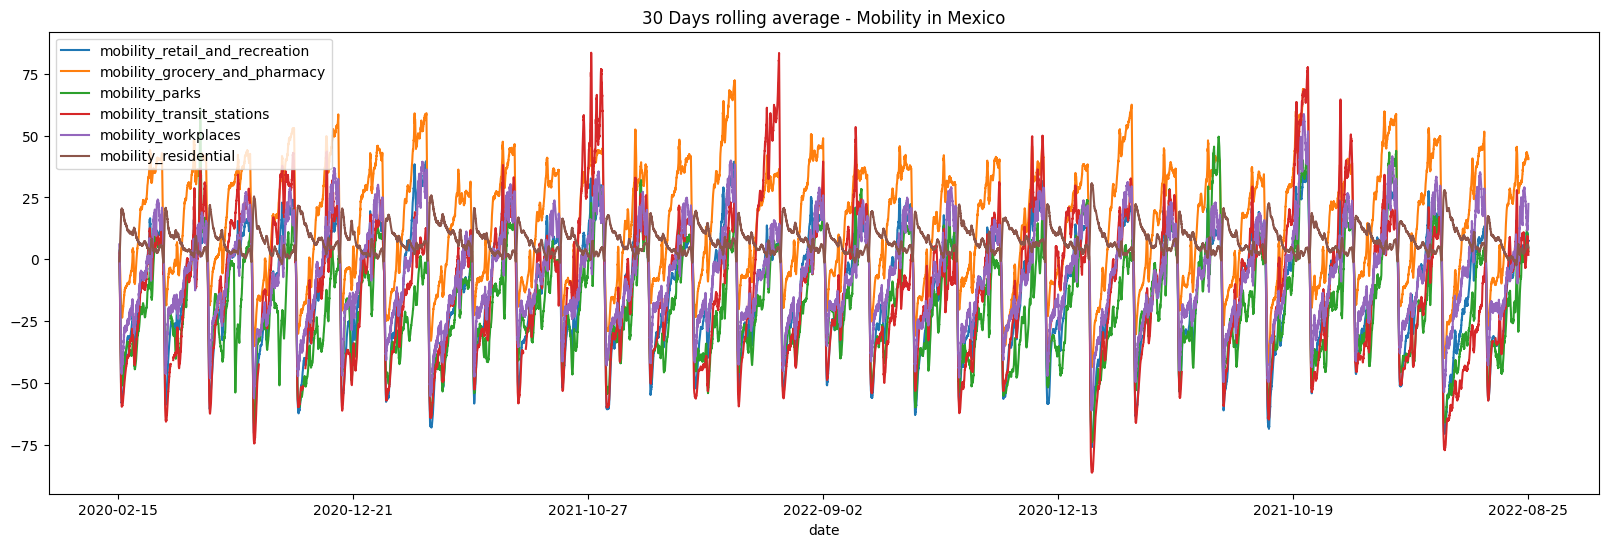

In [63]:
df_rolling_avg = calc_rolling_avg("Mexico", df_mobility.columns, 30)
df_rolling_avg.plot(figsize=(20, 6), x = "date", title = "30 Days rolling average - Mobility in Mexico")

### Part 3: Hospitalisations

Details: https://github.com/GoogleCloudPlatform/covid-19-open-data/blob/main/docs/table-hospitalizations.md

In [64]:
df_hosp = pd.read_csv(DATA_PATH+"hospitalizations.csv")
df_hosp.head()

,date,location_key,new_hospitalized_patients,cumulative_hospitalized_patients,current_hospitalized_patients,new_intensive_care_patients,cumulative_intensive_care_patients,current_intensive_care_patients,new_ventilator_patients,cumulative_ventilator_patients,current_ventilator_patients
0,0022-01-10,AR,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,0022-01-20,AR,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,0202-03-30,AR,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,0221-07-06,AR,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1202-01-07,AR,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [65]:
df_hosp = pd.merge(df_hosp, df_index[["location_key", "country_name"]], on = "location_key", how = "left")
df_hosp.head()

,date,location_key,new_hospitalized_patients,cumulative_hospitalized_patients,current_hospitalized_patients,new_intensive_care_patients,cumulative_intensive_care_patients,current_intensive_care_patients,new_ventilator_patients,cumulative_ventilator_patients,current_ventilator_patients,country_name
0,0022-01-10,AR,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,Argentina
1,0022-01-20,AR,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,Argentina
2,0202-03-30,AR,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,Argentina
3,0221-07-06,AR,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,Argentina
4,1202-01-07,AR,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,Argentina


<AxesSubplot:title={'center':'Hospitalizations in UK'}, xlabel='date'>

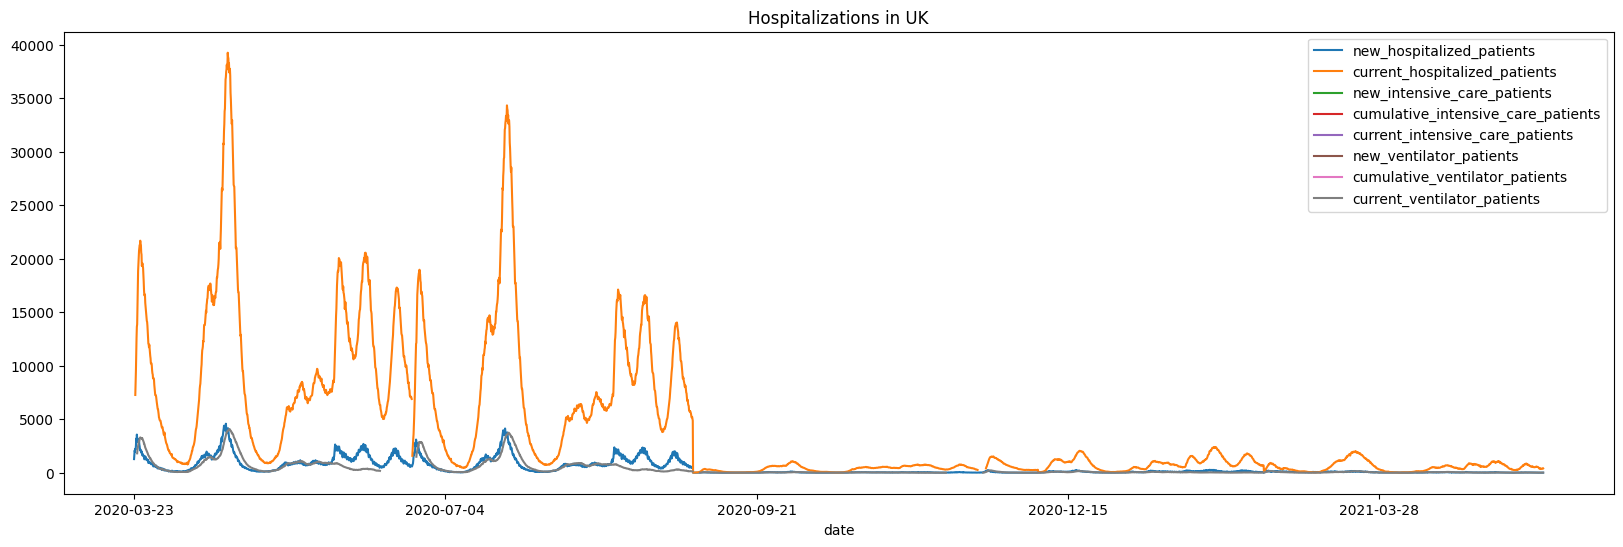

In [82]:
df_hosp.loc[df_hosp["country_name"] == "United Kingdom"].drop("cumulative_hospitalized_patients", axis = 1).plot(figsize=(20, 6), x = "date", title = "Hospitalizations in UK")

<AxesSubplot:xlabel='date'>

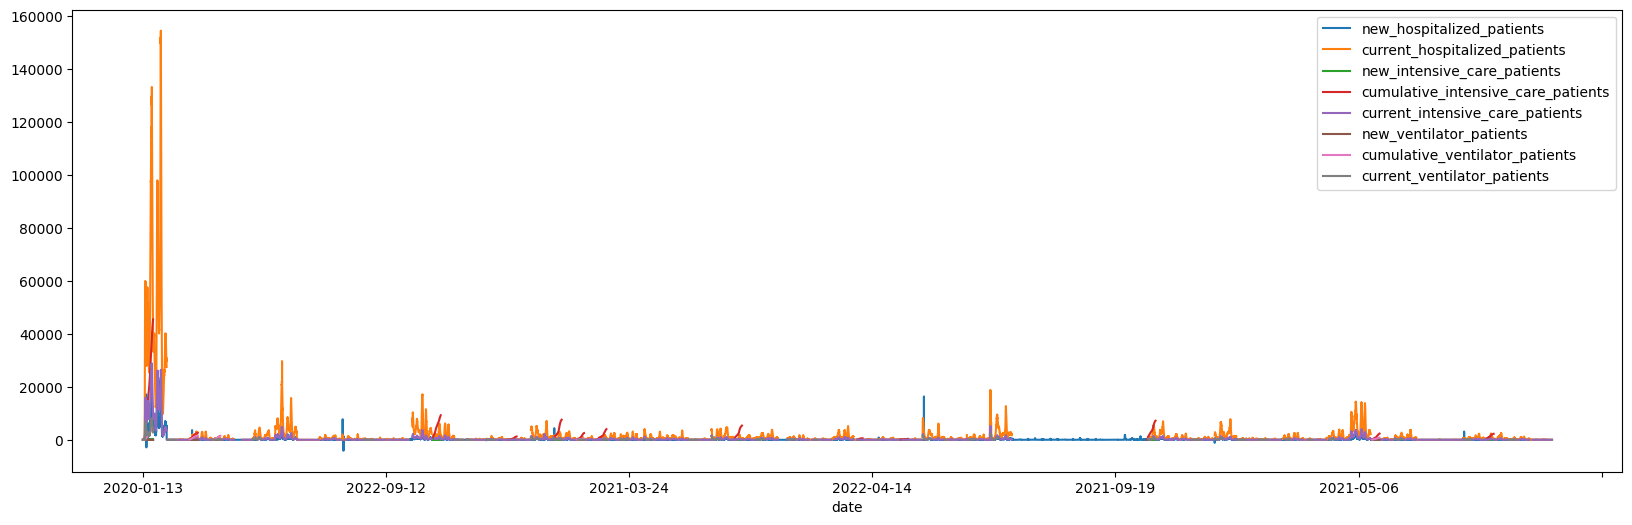

In [84]:
df_hosp.loc[df_hosp["country_name"] == "United States of America"].drop("cumulative_hospitalized_patients", axis = 1).plot(figsize=(20, 6), x = "date")